In [1]:
# ! pip install dask leidenalg

In [2]:
import sys

path_src = '../src'
sys.path.append(path_src)
import importlib
import SpatialAnalysis as SpAn
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np
import networkx as nx
from scipy.spatial import distance
from sklearn.neighbors import NearestNeighbors
from scipy.stats import entropy
import os
path_src = '../../mosna_benchmark/mosna/'
sys.path.append(path_src)
import mosna2 as mosna


In [89]:
import glob

fileList = glob.glob('../data/niche_simulations/node*')
MTs = pd.DataFrame()
for file in fileList:
    df = pd.read_csv(file, index_col=0)
    Model = df['model'].unique()[0]
    df.columns = ['Method', Model , 'model']
    df = df.drop('model',axis=1)
    if MTs.shape[0] == 0:
        MTs = df
    else:
        MTs = pd.merge(MTs, df, on='Method')
id = MTs['Method']
MTs = MTs.drop('Method', axis=1)
MTs.index = id
MTs = MTs.drop('Neighborhood')
MTs
# MT = df.pivot_table(index='Method',columns='model', values='Value')

,rare,gradual,boundries,isolated,doublets,overlap,adjacent
Method,,,,,,,
MOSNA,0.738863,0.871452,0.743119,1.0,0.966667,0.993399,0.961538
UTAG,0.700337,0.648790,0.757962,1.0,1.000000,0.931716,0.700893
CellCharter,1.000000,0.600634,0.824000,1.0,0.980000,0.807059,0.736211
BayesSpace,0.450397,0.202933,0.788333,1.0,0.520000,0.500000,0.652000
SquidPy,1.000000,0.365314,0.835000,1.0,0.980000,0.500000,0.652000
StLearn,1.000000,0.365314,0.835000,1.0,0.980000,0.500000,0.652000
imcRtools,0.580247,0.681857,0.792225,1.0,0.655060,0.808676,0.980342


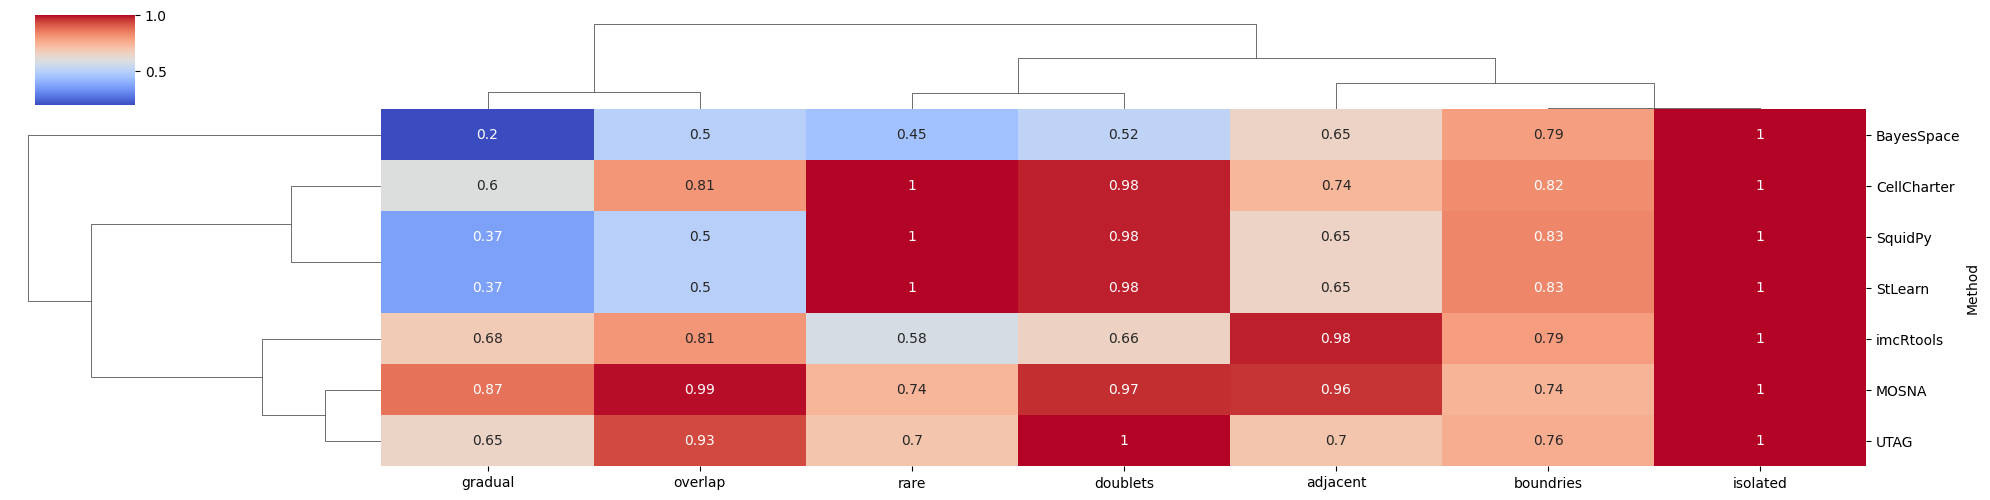

In [90]:
# fig, ax = plt.subplots(figsize=(20,5))
sns.clustermap(MTs, cmap ='coolwarm', annot=True , figsize=(20,5) , metric='cosine' )


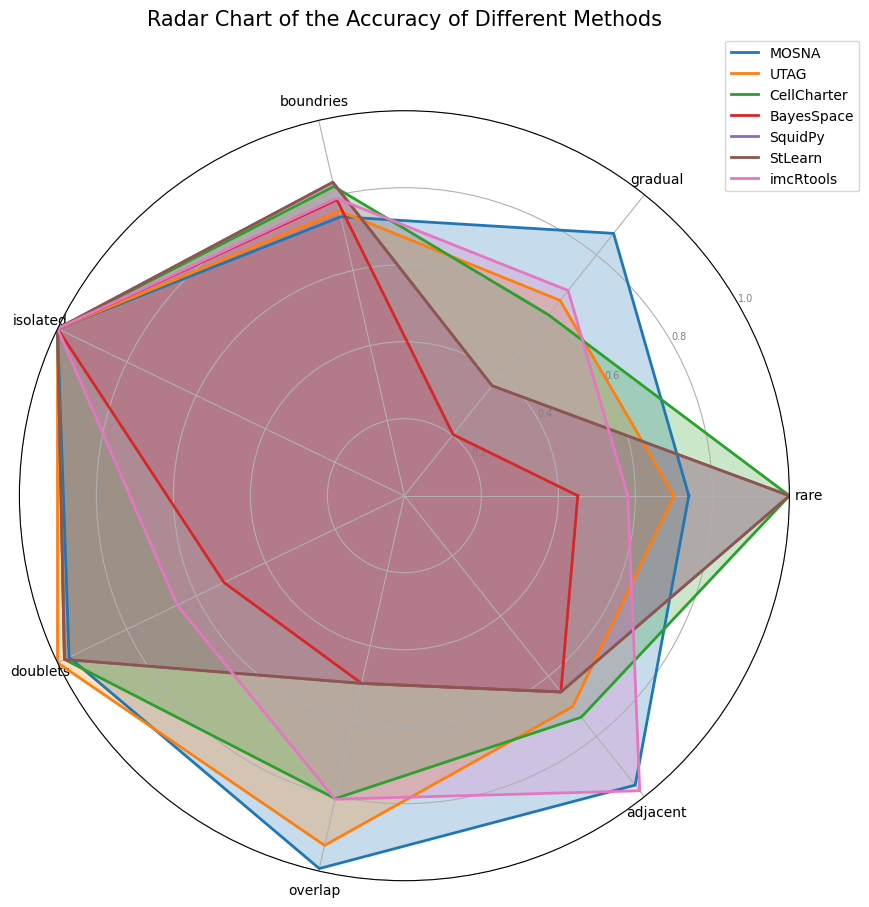

In [93]:
import numpy as np
from math import pi

# Data preparation for radar chart
categories = df.columns.tolist()
num_vars = len(categories)

# Compute angle of each axis
angles = [n / float(num_vars) * 2 * pi for n in range(num_vars)]
angles += angles[:1]

# Radar chart
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Plot each method
for i, method in enumerate(df.index):
    values = df.loc[method].tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=2, linestyle='solid', label=method)
    ax.fill(angles, values, alpha=0.25)

# Add labels
plt.xticks(angles[:-1], categories)
ax.set_rlabel_position(30)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=7)
plt.ylim(0, 1)

# Title and legend
plt.title('Radar Chart of the Accuracy of Different Methods', size=15, color='black', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Show plot
plt.show()


/home/abdelmounim.essabbar/mambaforge/lib/python3.10/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the barplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


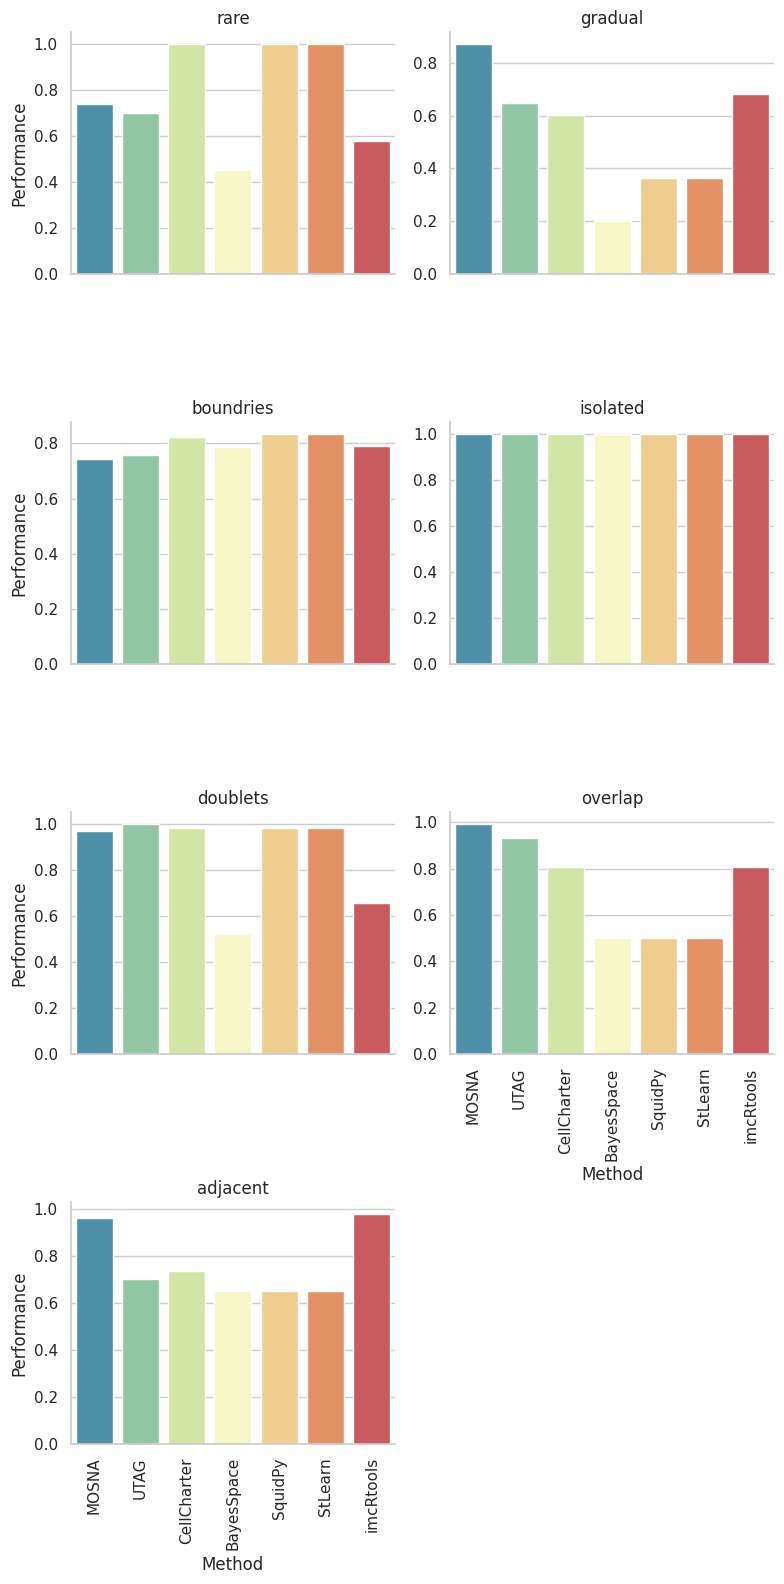

In [130]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Creating the DataFrame from the provided data
data = {
    'Method': ['MOSNA', 'UTAG', 'CellCharter', 'BayesSpace', 'SquidPy', 'StLearn', 'imcRtools'],
    'rare': [0.738863, 0.700337, 1.000000, 0.450397, 1.000000, 1.000000, 0.580247],
    'gradual': [0.871452, 0.648790, 0.600634, 0.202933, 0.365314, 0.365314, 0.681857],
    'boundries': [0.743119, 0.757962, 0.824000, 0.788333, 0.835000, 0.835000, 0.792225],
    'isolated': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    'doublets': [0.966667, 1.0, 0.980000, 0.520000, 0.980000, 0.980000, 0.655060],
    'overlap': [0.993399, 0.931716, 0.807059, 0.500000, 0.500000, 0.500000, 0.808676],
    'adjacent': [0.961538, 0.700893, 0.736211, 0.652000, 0.652000, 0.652000, 0.980342]
}

df = pd.DataFrame(data)

# Melting the DataFrame for seaborn's facet grid
df_melted = df.melt(id_vars='Method', var_name='Model', value_name='Performance')

# Creating the facet grid
g = sns.FacetGrid(df_melted, col='Model', col_wrap=2, sharey=False, height=4)
g.map(sns.barplot, 'Method', 'Performance', 'Method', order=df['Method'], palette='Spectral_r')
g.set_titles("{col_name}")

# Rotate the x labels for better readability
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)


plt.tight_layout()
plt.show()


